# Project: Data analysis on The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This is a data analysis on a dataset that contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

In this analysis, we have two research questions:

#### 1.Does having high budget associate with higher votes and higher popularity ?

#### 2.Which genres are most popular from year 1960 to year 2015 ?

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

#### Loading the data into the notebook.

In [2]:
df = pd.read_csv('tmdb-movies.csv')

#### Setting the id as the index for the DataFrame.

In [3]:
df.set_index('id', inplace=True);

#### First five rows of the data.

In [4]:
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.shape

(10866, 20)

The dataframe consists of 10866 rows and 20 columns.

#### Information about the dataframe.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  object 
 15  vote_count    

#### Checking the datatypes of the dataset.

In [7]:
df.dtypes

imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

#### Checking the dataset for any duplicates

In [8]:
df.duplicated().sum()

1

The dataset contains one duplicate. And this duplicate is:

In [9]:
df[df.duplicated() == True]

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


#### Checking for any null values in the dataframe.

In [10]:
df.isnull().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### First issue: The dataframe contains a duplicate.

#### Second issue: There is various variables with null values.

#### Third issue: Each movie may have various types of genres which are seperated by "|".

In [11]:
df.genres.head()

id
135397    Action|Adventure|Science Fiction|Thriller
76341     Action|Adventure|Science Fiction|Thriller
262500           Adventure|Science Fiction|Thriller
140607     Action|Adventure|Science Fiction|Fantasy
168259                        Action|Crime|Thriller
Name: genres, dtype: object

#### Fourth issue: Many of the movies budget is not avaliable and is just entered "zero" in the dataset

In [12]:
df[df.budget == 0].shape[0]

5696

5674 movie have no information for budget

### Data Cleaning 

#### Starting the data cleaning with the first issue by removing the duplicates.

In [13]:
df.drop_duplicates(inplace=True)

#### Checking again for any duplicates.

In [14]:
df.duplicated().sum()

0

#### Second issue is to remove null inputs, however we are not interested in some of these columns, so we are going to remove the whole column.

In [15]:
df.columns

Index(['imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [16]:
df.drop(['imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'homepage','director', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date'], axis=1, inplace=True)

#### Checking the dataframe again.

In [17]:
df.head()

,popularity,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,
135397,32.985763,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,13.112507,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,11.173104,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,9.335014,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [18]:
df.shape

(10865, 7)

#### Lets see if the removed columns have removed some of the null values.

In [19]:
df.isnull().sum()

popularity       0
genres          23
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

#### We removed unwanted information and it removed most of the null inputs, however, there is still null values in genres so we will drop any rows with null value.

In [20]:
df.dropna(inplace=True)

#### Check for null values.

In [21]:
df.isnull().sum()

popularity      0
genres          0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

In [22]:
df.shape

(10842, 7)

Null values have been removed and now the dataframe consists of 10842 rows and 7 columns.

#### Third issue with our data is that each movie have various input in genres, so will split the genres of the movies.

In [23]:
df_genres = df.genres.str.split("|", expand=True)

In [24]:
df_genres.head()

,0,1,2,3,4
id,,,,,
135397,Action,Adventure,Science Fiction,Thriller,None
76341,Action,Adventure,Science Fiction,Thriller,None
262500,Adventure,Science Fiction,Thriller,None,None
140607,Action,Adventure,Science Fiction,Fantasy,None
168259,Action,Crime,Thriller,None,None


#### Some movies have upto 5 genres and other don't. 

#### And as we are only interested with genres related to its popularity between certain years, we can make a method that takes the dataframe and start and end date and return dataframe with the genres between these years.

In [25]:
def genres_between_years(df, start, end):
    df_m = df.query('@start <= release_year < @end')
    df_genres = df_m.genres.str.split("|", expand=True)
    df_genres = df_genres.stack()
    df_genres = pd.DataFrame(df_genres)
    df_genres.rename(columns={0:'genres'}, inplace=True)
    return df_genres

An example using the "genres_between_years" method.

In [26]:
df_example = genres_between_years(df, 1960, 1970)

In [27]:
df_example.value_counts()

genres         
Drama              168
Comedy             113
Action              78
Romance             67
Adventure           64
Thriller            64
Horror              47
Crime               43
Family              39
Western             36
Science Fiction     34
Mystery             32
War                 31
History             31
Fantasy             23
Music               21
Animation           16
Foreign              9
Documentary          2
TV Movie             2
dtype: int64

We can obtain the most popular genre between 1960(inclusive) and 1970(exclusive) using the previous dataframe.

In [28]:
df_example.genres.value_counts().index[0]

'Drama'

'Drama' is the most popular genre between 1960(inclusive) and 1970(exclusive).

#### To fix the fourth issue, we will create a new dataset and remove all the rows with zero budget.

In [29]:
df_budget = df.query('budget_adj > 0')

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Does having high budget associate with higher votes and higher popularity ?

#### We will start by looking at the budget across the dataset.

In [30]:
df_budget.budget_adj.describe()

count    5.168000e+03
mean     3.689620e+07
std      4.196188e+07
min      9.210911e-01
25%      8.102293e+06
50%      2.272271e+07
75%      5.008384e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

We could see that the budget could get as low as less than a dollar and could get as high as 425 million dollars.

#### Lets have a look on the distribution of the budgets of the movies across the dataset.

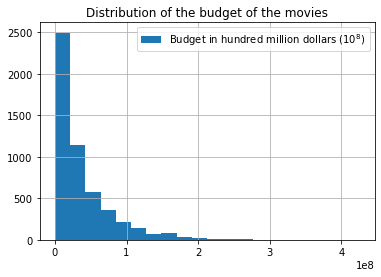

In [31]:
df_budget.budget_adj.hist(bins=20, label="Budget in hundred million dollars ($10^8$)");
plt.title("Distribution of the budget of the movies")
plt.legend();

From the previous plot, Many of the movies have a budget lower than hunderd million dollars.

#### Let's look at details of the average votes of the movies.

In [32]:
df_budget.vote_average.describe()

count    5168.000000
mean        6.032895
std         0.883203
min         1.500000
25%         5.500000
50%         6.100000
75%         6.600000
max         8.400000
Name: vote_average, dtype: float64

We can see the minimum vote value is 1.5, maximum vote value is 8.4 and an average of 6.032895.

#### We will check the relation between the budget and the votes to find if there is a correlation between both of them.

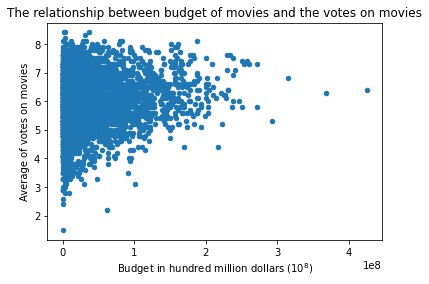

In [33]:
df_budget.plot('budget_adj', 'vote_average', kind="scatter",xlabel="Budget in hundred million dollars ($10^8$)", ylabel="Average of votes on movies")
plt.title("The relationship between budget of movies and the votes on movies");

As it may seem from the previous plot that as the budget increase the voting increases but there is no correlation between them as many of the highly rated movies are in the low budget area.

#### Let's look at details of the popularity of the movies.

In [34]:
df_budget.popularity.describe()

count    5168.000000
mean        0.992525
std         1.329360
min         0.001117
25%         0.348157
50%         0.624462
75%         1.152547
max        32.985763
Name: popularity, dtype: float64

The movies have minimum popularity of 0.0011, a maximum popularity value of 32.9857 and an average of 0.9925.

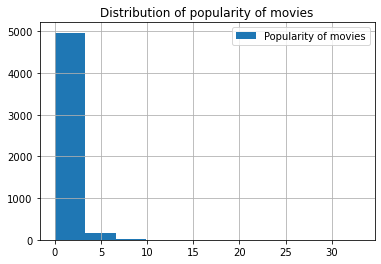

In [35]:
df_budget.popularity.hist(label="Popularity of movies")
plt.title("Distribution of popularity of movies")
plt.legend();

From the plot, Many of the movies tends to have a low popularity.

#### We will check the relation between the budget and the popularity to find if there is a correlation between both of them.

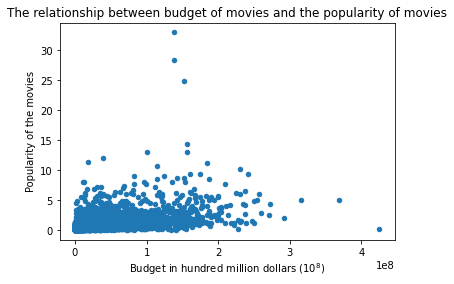

In [36]:
df_budget.plot('budget_adj', 'popularity', kind= "scatter", xlabel="Budget in hundred million dollars ($10^8$)",ylabel="Popularity of the movies")
plt.title("The relationship between budget of movies and the popularity of movies");

From the previous plot, it seems that there is no correlation between the increase in budget and the increase in popularity.

### Research Question 2 : Which genres are most popular from year 1960 to year 2015 ?

#### A brief on the genres of the first five rows in the dataset

In [37]:
df.genres.head()

id
135397    Action|Adventure|Science Fiction|Thriller
76341     Action|Adventure|Science Fiction|Thriller
262500           Adventure|Science Fiction|Thriller
140607     Action|Adventure|Science Fiction|Fantasy
168259                        Action|Crime|Thriller
Name: genres, dtype: object

#### Lets check the count of genres along the years from 1960 to 2015.

In [38]:
df_genres = genres_between_years(df, df.release_year.min(), df.release_year.max())
df_genres.value_counts()

genres         
Drama              4500
Comedy             3631
Thriller           2736
Action             2277
Romance            1655
Horror             1512
Adventure          1402
Crime              1303
Family             1187
Science Fiction    1143
Fantasy             883
Mystery             768
Animation           660
Documentary         463
Music               375
History             319
War                 261
Foreign             188
Western             159
TV Movie            147
dtype: int64

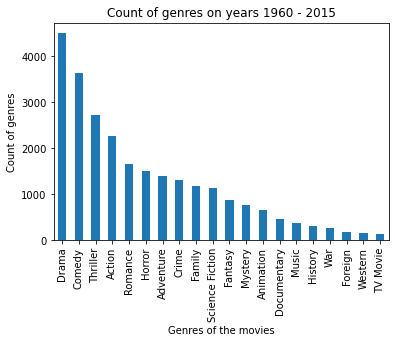

In [39]:
df_genres.genres.value_counts().plot(kind="bar", xlabel="Genres of the movies", ylabel="Count of genres");
plt.title("Count of genres on years 1960 - 2015");

#### We will compare the popularity of genres across the dataset by intervals of 15 years.

Starting by first two intervals (1960 - 1975) and (1975 - 1990).

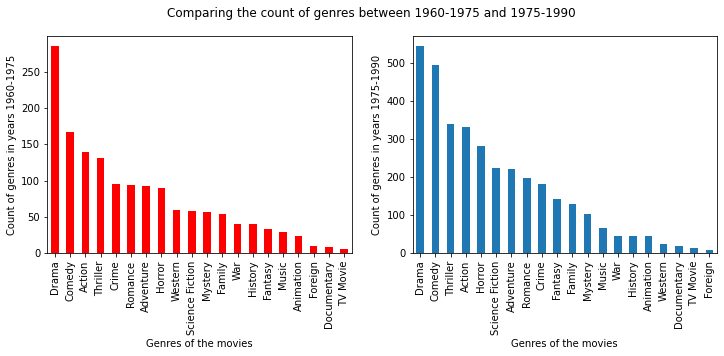

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 4))
plt.suptitle("Comparing the count of genres between 1960-1975 and 1975-1990");
genres_between_years(df, 1960, 1975).genres.value_counts().plot(kind="bar", xlabel="Genres of the movies", ylabel="Count of genres in years 1960-1975",color = "red", ax=ax1)
genres_between_years(df, 1975, 1990).genres.value_counts().plot(kind="bar", xlabel="Genres of the movies", ylabel="Count of genres in years 1975-1990", ax=ax2);

As seen the previous plots, Drama, the genre, was dominant across the movies at these two intervals. Comedy movies in the first interval wasn't as popular as drama movies, however, in the second interval, comedy movies became more popular. 

#### Moving forward to the other intervals (1990 - 2005) and (2005 - 2015).

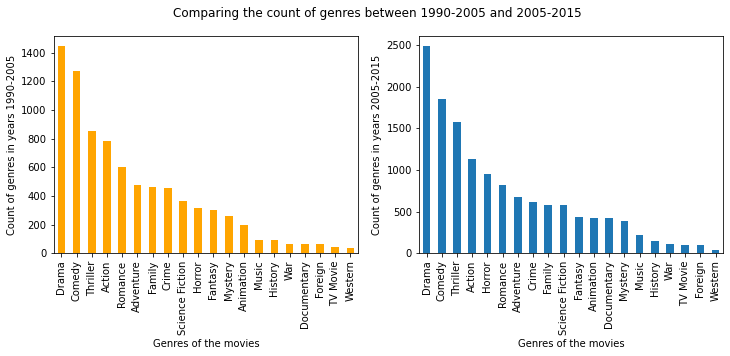

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 4))
plt.suptitle("Comparing the count of genres between 1990-2005 and 2005-2015");
genres_between_years(df, 1990, 2005).genres.value_counts().plot(kind="bar", xlabel="Genres of the movies", ylabel="Count of genres in years 1990-2005",color = "orange", ax=ax1)
genres_between_years(df, 2005, 2016).genres.value_counts().plot(kind="bar", xlabel="Genres of the movies", ylabel="Count of genres in years 2005-2015", ax=ax2);

As seen the previous plots, Drama and Comedy, the genres, were also dominant across the movies in these intervals. From the plots, We can see also that Thriller and Action movies were popular in the four intervals.

From year 1960 to year 2015, Drama movies was the most dominant across all the genres of movies.

<a id='conclusions'></a>
## Conclusions
In conclusion, After performing data analysis on the dataset The Movie Database (TMDb), which contains information about 10,000 movies, we are able to answer our research questions. For the question regarding whether high budget associate with higher votes and higher popularity, It could be concluded that there is no correlation between budget and votes or between budget and popularity. And regarding the question about the most popular genres from year 1960 through year 2015, The four genres, Drama, Comedy, Thriller, Action, were dominant throughout the list, However, Drama movies was the most dominant. Some of the limitations were some of the genres were missing and the budget of many movies was not available. For additional research, Information on movies from year 2015 to year 2022 could be useful to improve the analysis and to be up-to-date.